# Data of a kimberlitic model with induced magnetization

This notebook generates a toal field anomaly (TFA) and an amplitude of the anomalous magnetic field (AMF) data from a kimberlitic model in a regular grid.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle

from matplotlib import colors, ticker, cm
from IPython.display import Image as img
from fatiando.gravmag import polyprism
from fatiando.vis import mpl

/home/leonardo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


### Auxiliary functions

In [2]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun

### The model

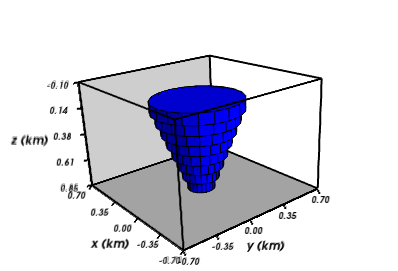

In [3]:
img(filename='../../synthetic_data/kimberlite/kimberlite_true.png')

### Importing model and grid

In [4]:
with open('../../synthetic_data/kimberlite/kimberlite_model.pickle') as w:
        kimberlite_model = pickle.load(w)
with open('../../synthetic_data/grids/regular_grid.pickle') as w:
        regular_grid = pickle.load(w)

### Generating data

In [5]:
kimberlite_data = dict()

In [6]:
# TFA data
kimberlite_data['tfa'] = polyprism.tf(regular_grid['xp'], regular_grid['yp'], regular_grid['zp'], \
                           kimberlite_model['prisms'], kimberlite_model['inc'], kimberlite_model['dec']) # predict data

amp_noise = 0.02*np.max(kimberlite_data['tfa'])
kimberlite_data['tfa_obs'] = kimberlite_data['tfa'] + np.random.normal(loc=0., scale=amp_noise,
                               size=regular_grid['shape'][0]*regular_grid['shape'][1]) # noise corrupted tfa data

In [7]:
# AMF data
kimberlite_data['bx'] = polyprism.bx(regular_grid['xp'], regular_grid['yp'], regular_grid['zp'], kimberlite_model['prisms'])
kimberlite_data['by'] = polyprism.by(regular_grid['xp'], regular_grid['yp'], regular_grid['zp'], kimberlite_model['prisms'])
kimberlite_data['bz'] = polyprism.bz(regular_grid['xp'], regular_grid['yp'], regular_grid['zp'], kimberlite_model['prisms'])

kimberlite_data['amf'] = np.sqrt(kimberlite_data['bx']**2. + kimberlite_data['by']**2. + kimberlite_data['bz']**2.)

amp_noise = 0.02*np.max(kimberlite_data['amf'])
kimberlite_data['amf_obs'] = kimberlite_data['amf'] + np.random.normal(loc=0., scale=amp_noise,
                               size=regular_grid['shape'][0]*regular_grid['shape'][1]) # noise corrupted amf data

### Data ploting

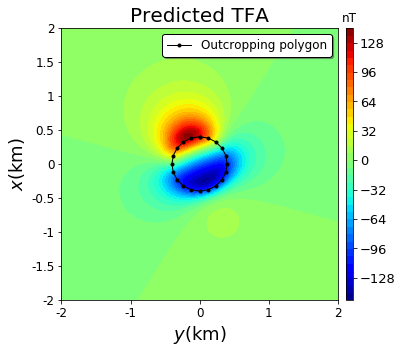

In [8]:
plt.figure(figsize=(6,5))
plt.title('Predicted TFA', fontsize=20)
plt.tricontourf(regular_grid['yp'], regular_grid['xp'], kimberlite_data['tfa'], 40, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
source = mpl.polygon(kimberlite_model['prisms'][0], '.-k', xy2ne=True)
source.set_label('Outcropping polygon')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
plt.savefig('../../synthetic_data/kimberlite/pre_tfa.png', dpi=300)
plt.show()

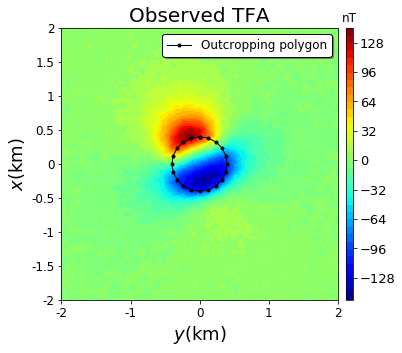

In [9]:
plt.figure(figsize=(6,5))
plt.title('Observed TFA', fontsize=20)
plt.tricontourf(regular_grid['yp'], regular_grid['xp'], kimberlite_data['tfa_obs'], 40, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
source = mpl.polygon(kimberlite_model['prisms'][0], '.-k', xy2ne=True)
source.set_label('Outcropping polygon')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
plt.savefig('../../synthetic_data/kimberlite/obs_tfa.png', dpi=300)
plt.show()

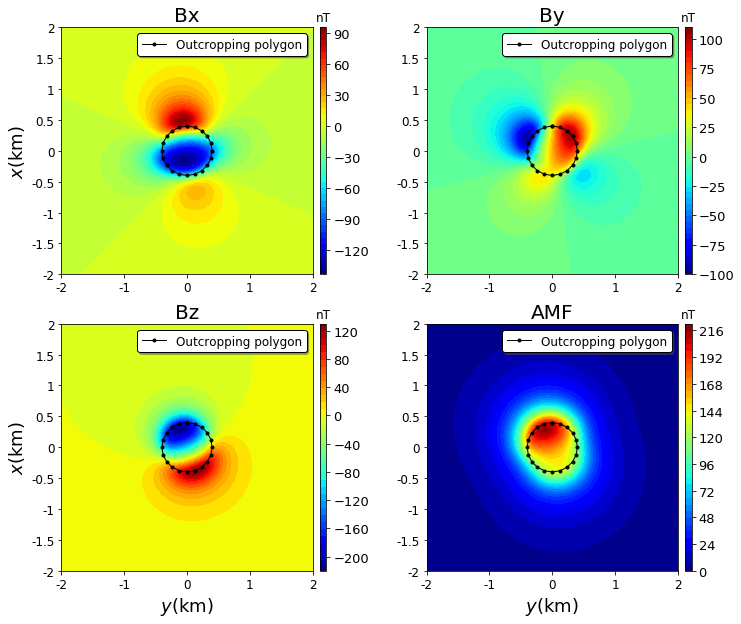

In [10]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.title('Bx', fontsize=20)
plt.tricontourf(regular_grid['yp'], regular_grid['xp'], kimberlite_data['bx'], 40, cmap='jet').ax.tick_params(labelsize=12)
#plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
source = mpl.polygon(kimberlite_model['prisms'][0], '.-k', xy2ne=True)
source.set_label('Outcropping polygon')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')

plt.subplot(2,2,2)
plt.title('By', fontsize=20)
plt.tricontourf(regular_grid['yp'], regular_grid['xp'], kimberlite_data['by'], 40, cmap='jet').ax.tick_params(labelsize=12)
#plt.xlabel('$y$(km)', fontsize=18)
#plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
source = mpl.polygon(kimberlite_model['prisms'][0], '.-k', xy2ne=True)
source.set_label('Outcropping polygon')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')

plt.subplot(2,2,3)
plt.title('Bz', fontsize=20)
plt.tricontourf(regular_grid['yp'], regular_grid['xp'], kimberlite_data['bz'], 40, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
source = mpl.polygon(kimberlite_model['prisms'][0], '.-k', xy2ne=True)
source.set_label('Outcropping polygon')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')

plt.subplot(2,2,4)
plt.title('AMF', fontsize=20)
plt.tricontourf(regular_grid['yp'], regular_grid['xp'], kimberlite_data['amf'], 40, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
#plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
source = mpl.polygon(kimberlite_model['prisms'][0], '.-k', xy2ne=True)
source.set_label('Outcropping polygon')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')

plt.savefig('../../synthetic_data/kimberlite/bcomponents_amf.png', dpi=300)
plt.show()

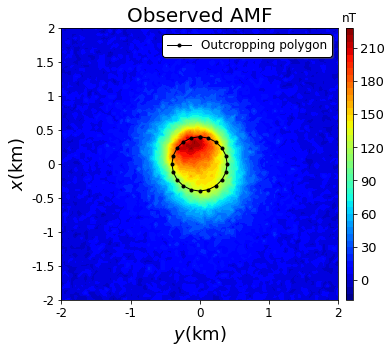

In [11]:
plt.figure(figsize=(6,5))
plt.title('Observed AMF', fontsize=20)
plt.tricontourf(regular_grid['yp'], regular_grid['xp'], kimberlite_data['amf_obs'], 40, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
source = mpl.polygon(kimberlite_model['prisms'][0], '.-k', xy2ne=True)
source.set_label('Outcropping polygon')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
plt.savefig('../../synthetic_data/kimberlite/obs_amf.png', dpi=300)
plt.show()

### Saving in an outer file

In [12]:
file_name = '../../synthetic_data/kimberlite/kimberlite_data.pickle'
with open(file_name, 'w') as f:
    pickle.dump(kimberlite_data, f)